
# Indice dinamico de articulos de contruccion

Para el indice contare con las categorias de los productos a listar sobre productos de obra y ademas con los enlaces a los mismos, la primera parte sera solo para obra humeda

1. Cemento
2. Chapa
3. Ladrillo Hueco
4. Hierro
5. Arena


* https://www.easy.com.ar/construccion/construccion?layout=grid&order=OrderByTopSaleDESC
* https://ferromundo.com.ar/product-category/construccion/
* https://www.mercadolibre.com.ar/c/construccion
* https://carlosisla.com.ar/
* https://carlosisla.com.ar/siderometalurgico/chapas/?mpage=3
* https://beautiful-soup-4.readthedocs.io/en/latest/




In [32]:
import pandas as pd

from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup

In [33]:



# URL de la página
url = 'https://carlosisla.com.ar/siderometalurgico/chapas/?mpage=3'

# Realizar la solicitud HTTP para obtener el contenido de la página
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Obtener el HTML de la página
    html_text = response.text

    # Parsear el HTML
    soup = BeautifulSoup(html_text, 'html.parser')

    # Encontrar todas las etiquetas span con la clase 'js-price-display item-price'
    price_spans = soup.find_all('span', class_='js-price-display item-price')

    # Iterar sobre todas las etiquetas span encontradas
    for price_span in price_spans:
        # Obtener el texto dentro de la etiqueta span
        price_with_currency = price_span.text.strip()

        # Imprimir el texto
        print("Precio", price_with_currency)
else:
    print("Error al cargar la página:", response.status_code)



Precio $33.008,46
Precio $39.018,95
Precio $41.285,21
Precio $126.335,37
Precio $88.285,32
Precio $40.891,08
Precio $90.600,83
Precio $36.690,42
Precio $57.641,64
Precio $68.506,06
Precio $26.761,82
Precio $57.641,64


In [34]:


# URL de la página
url = 'https://carlosisla.com.ar/siderometalurgico/chapas/?mpage=3'

# Realizar la solicitud HTTP para obtener el contenido de la página
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Obtener el HTML de la página
    html_text = response.text

    # Parsear el HTML
    soup = BeautifulSoup(html_text, 'html.parser')

    # Encontrar todas las etiquetas div con la clase 'js-item-name item-name mb-3'
    name_divs = soup.find_all('div', class_='js-item-name item-name mb-3')

    # Iterar sobre todas las etiquetas div encontradas
    for name_div in name_divs:
        # Obtener el texto dentro de la etiqueta div
        item_name = name_div.text.strip()

        # Imprimir el nombre del ítem
        print("Nombre del ítem:", item_name, "precio", price_with_currency)
else:
    print("Error al cargar la página:", response.status_code)





Nombre del ítem: Chapa Canaleta Galvanizada 27 precio $57.641,64
Nombre del ítem: Chapa Canaleta Galvanizada 25 precio $57.641,64
Nombre del ítem: Chapa Trapezoidal Cincalum precio $57.641,64
Nombre del ítem: Chapa Lisa Galvanizada precio $57.641,64
Nombre del ítem: Chapa Lisa Negra precio $57.641,64
Nombre del ítem: Chapa Canaleta Cincalum precio $57.641,64
Nombre del ítem: Chapa Trapezoidal Negra precio $57.641,64
Nombre del ítem: Chapa Trapezoidal Plástica precio $57.641,64
Nombre del ítem: Chapa Trapezoidal Verde precio $57.641,64
Nombre del ítem: Chapa Canaleta Polipropileno precio $57.641,64
Nombre del ítem: Chapa Canaleta Plástica precio $57.641,64
Nombre del ítem: Chapa Canaleta color Roja precio $57.641,64


In [35]:


# URL de la página
url = 'https://carlosisla.com.ar/siderometalurgico/chapas/?mpage=3'

# Realizar la solicitud HTTP para obtener el contenido de la página
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Obtener el HTML de la página
    html_text = response.text

    # Parsear el HTML
    soup = BeautifulSoup(html_text, 'html.parser')

    # Encontrar todas las etiquetas div con la clase 'js-item-name item-name mb-3'
    name_divs = soup.find_all('div', class_='js-item-name item-name mb-3')
    # Encontrar todas las etiquetas div con la clase 'js-item-price item-price'
    price_divs = soup.find_all('div', class_='js-item-price item-price')

    # Listas para almacenar los nombres de los productos y los precios
    product_names = []
    product_prices = []

    # Iterar sobre todas las etiquetas div encontradas
    for name_div, price_div in zip(name_divs, price_divs):
        # Obtener el texto dentro de la etiqueta div para nombre y precio
        item_name = name_div.text.strip()
        price_with_currency = price_div.text.strip()
        
        # Agregar el nombre del producto y el precio a las listas
        product_names.append(item_name)
        product_prices.append(price_with_currency)

    # Crear un DataFrame a partir de las listas de nombres y precios
    df = pd.DataFrame({
        'Producto': product_names,
        'Precio': product_prices
    })

    # Imprimir el DataFrame
    print(df)
else:
    print("Error al cargar la página:", response.status_code)


Empty DataFrame
Columns: [Producto, Precio]
Index: []


Mercado Libre

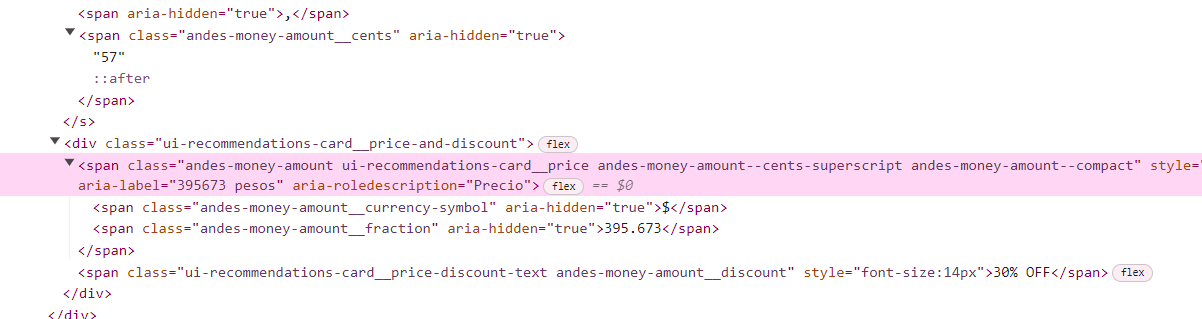

In [36]:


ladrillo_ml = "https://listado.mercadolibre.com.ar/construccion/materiales-obra/obra-pesada/ladrillos/"
chapa_ml = "https://listado.mercadolibre.com.ar/construccion/materiales-obra/chapas/"
hierro_ml = "https://listado.mercadolibre.com.ar/construccion/materiales-obra/hierros/hierros-construccion/"
cemento_ml= "https://www.mercadolibre.com.ar/mas-vendidos/MLA372021?new_bestseller_landing=false#origin=pdp"

ml = [ladrillo_ml, chapa_ml, hierro_ml, cemento_ml]

# Función para extraer la información de cada URL
def extract_info(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    # Buscar el selector en la página
    money_amount = soup.find('span', class_='andes-money-amount__fraction')
    if money_amount:
        return money_amount.text.strip()
    else:
        return "No se encontró la información en esta página"

# Iterar sobre cada URL y extraer la información
for url in ml:
    print("URL:", url)
    info = extract_info(url)
    print("Información encontrada:", info)
    print()



URL: https://listado.mercadolibre.com.ar/construccion/materiales-obra/obra-pesada/ladrillos/
Información encontrada: 7.686

URL: https://listado.mercadolibre.com.ar/construccion/materiales-obra/chapas/
Información encontrada: 3.500

URL: https://listado.mercadolibre.com.ar/construccion/materiales-obra/hierros/hierros-construccion/
Información encontrada: 19.500

URL: https://www.mercadolibre.com.ar/mas-vendidos/MLA372021?new_bestseller_landing=false#origin=pdp
Información encontrada: 9.262

